In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import ipywidgets as widgets
import scipy.stats as stats
sns.set()
plt.style.use([{
    "figure.figsize": (20, 20),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
}, 'seaborn-poster'])

In [4]:
food_price = web.DataReader('prc_dap15',
                            start='2000',
                            end='2020',
                            data_source='eurostat')

In [5]:
food_price.head()

UNIT                          Euro                 \
COICOP      Long-grain rice (1 kg)                  
GEO                       Bulgaria Cyprus Czechia   
FREQ                        Annual Annual  Annual   
TIME_PERIOD                                         
2015-01-01                     NaN   2.26    1.32   

UNIT                                                                         \
COICOP                                                                        
GEO         Germany (until 1990 former territory of the FRG)  Spain Finland   
FREQ                                                  Annual Annual  Annual   
TIME_PERIOD                                                                   
2015-01-01                                               NaN   1.29    2.41   

UNIT                                         ...       National currency  \
COICOP                                       ... Toilet paper (10 rolls)   
GEO         Croatia  Italy Lithuania  Malta  ...                   Italy   
FREQ         Annual Annual    Annual Annual  ...                  Annual   
TIME_PERIOD                                  ...                           
2015-01-01     3.02   2.59      1.02   2.88  ...                    4.59   

UNIT                                                                     \
COICOP                                                                    
GEO         Lithuania  Malta Netherlands Norway Poland Romania Slovenia   
FREQ           Annual Annual      Annual Annual Annual  Annual   Annual   
TIME_PERIOD                                                               
2015-01-01       3.46   2.39        2.85   56.1  11.05   14.01     2.95   

UNIT                         
COICOP                       
GEO         Slovakia Turkey  
FREQ          Annual Annual  
TIME_PERIOD                  
2015-01-01      2.92  10.01  

[1 rows x 6460 columns]

In [6]:
food_price.columns

MultiIndex([(             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            (             'Euro',  'Long-grain rice (1 kg)', ...),
            ...
            ('National currency', 'Toilet paper (10 rolls)', ...),
            ('National currency', 'Toilet paper (10 rolls)', ...),
            ('National currency', 'Toilet paper (10 rolls)', ...),
            ('National currency', 'Toilet paper (10 rolls)', ...),
            ('National currency', 'Toilet pape

In [31]:
fprice = food_price.droplevel([0, 3], axis=1).melt().pivot_table(columns='COICOP',index='GEO', values='value')
fprice.head()

COICOP,Acetylsalicylic acid (10 tablets),Aciclovir (2 g),All-purposes household cleaner (1 l),Alprazolam (10 tablets),Apples (1 kg),Armchair (1 piece),Atorvastatin (10 tablets),"Baby food, meat base (500 g)",Battery (1 piece),Bedlinen (1 set),...,"Video game, PlayStation 3 (1 piece)",Vodka (1 l),Wardrobe (1 piece),"Washing machine, 6-7 kg, energy efficiency A++/A+++ (1 piece)",Wheat flour (1 kg),"White bread, loaf (1 kg)",White sugar (1 kg),White wine (0.75 l),Whole chicken (1 kg),Winter tyres (4 tyres)
GEO,,,,,,,,,,,,,,,,,,,,,
Bulgaria,2.175,8.990,2.010,0.56,1.355,NaN,3.710,4.36,0.945,NaN,...,NaN,14.335,NaN,402.70,0.815,1.02,1.06,1.87,3.715,494.105
Croatia,NaN,NaN,11.700,NaN,4.555,NaN,NaN,17.11,4.225,97.64,...,NaN,40.335,1162.840,1550.67,3.220,6.83,2.99,11.43,13.180,894.225
Cyprus,1.150,5.210,2.030,1.42,1.670,195.28,9.550,3.78,0.960,24.05,...,57.88,15.990,156.670,410.67,1.190,2.07,0.82,4.90,3.810,NaN
Czechia,24.195,107.335,31.505,14.18,15.575,NaN,10.325,45.12,NaN,357.93,...,NaN,144.650,2238.115,5136.44,6.550,11.64,9.22,48.00,35.940,NaN
Finland,NaN,NaN,2.700,NaN,2.090,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.670,3.84,0.93,NaN,NaN,NaN


In [8]:
for col in fprice.columns: 
    print(col) 

Acetylsalicylic acid (10 tablets)
Aciclovir (2 g)
All-purposes household cleaner (1 l)
Alprazolam (10 tablets)
Apples (1 kg)
Armchair (1 piece)
Atorvastatin (10 tablets)
Baby food, meat base (500 g)
Battery (1 piece)
Bedlinen (1 set)
Beef, minced (1 kg)
Beer (1 l)
Beer (lager), domestic, 0.5 l (1 glass)
Black pepper (100 g)
Black tea (25 bags)
Blank DVDs (R), slim cases (10 pieces)
Blank compact disc (CD-R) (10 pieces)
Blanket (1 piece)
Blu-ray disc player (1 piece)
Board game, Monopoly (1 piece)
Brassiere, push-up (1 piece)
Butter, unsalted (250 g)
Canned fruit (1 kg/net)
Car battery (1 piece)
Car hire (7 days)
Car wash (1 service)
Carbonated drink, orange flavoured (1 l)
Cartridges for safety razor, men (5 cartridges)
Cement (25 kg)
Cetirizine (10 tablets)
Change of oil (1 service)
Cheese, Camembert type (1 kg)
Cheese, Gouda type (1 kg)
Chewing gum (1 package)
Chicken breast, fillets (1 kg)
Chicken eggs (10 eggs)
Children' T-shirt, long sleeves (1 piece)
Children' s jeans trousers (1

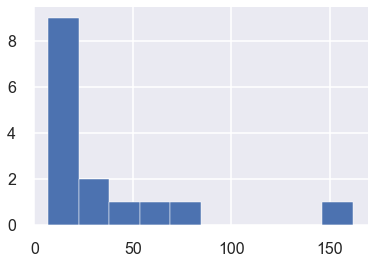

In [9]:
fprice['Coffee (1 kg)'].hist();

In [10]:
fprice.mean()

COICOP
Acetylsalicylic acid (10 tablets)         6.256000
Aciclovir (2 g)                          19.896111
All-purposes household cleaner (1 l)      6.121154
Alprazolam (10 tablets)                   3.364444
Apples (1 kg)                             3.337353
                                           ...    
White bread, loaf (1 kg)                  3.755667
White sugar (1 kg)                        2.266471
White wine (0.75 l)                      14.031923
Whole chicken (1 kg)                      7.836250
Winter tyres (4 tyres)                  507.681875
Length: 190, dtype: float64

In [11]:
fprice['Coffee (1 kg)'].mean()

32.672

In [12]:
fprice['Coffee (1 kg)'].median()

12.03

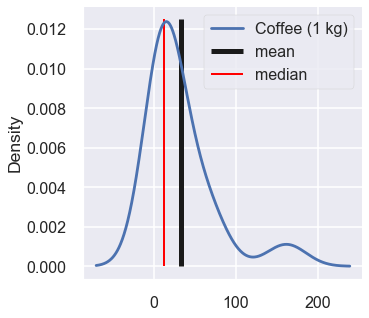

In [13]:
fprice['Coffee (1 kg)'].plot(kind="density",
               figsize=(5, 5))
plt.vlines(fprice['Coffee (1 kg)'].mean(),
           ymin=0,
           ymax=0.0125,
           linewidth=5.0, label='mean')
plt.vlines(fprice['Coffee (1 kg)'].median(),
           ymin=0,
           ymax=0.0125,
           linewidth=2.0,
           color="red", label='median')
plt.legend();

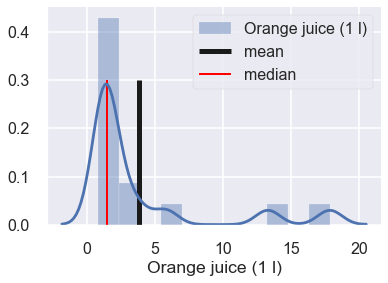

In [14]:
sns.distplot(fprice["Orange juice (1 l)"].dropna(), norm_hist=False, kde=True, label='Orange juice (1 l)');
plt.vlines(fprice['Orange juice (1 l)'].mean(),
           ymin=0,
           ymax=0.3,
           linewidth=5.0, label='mean')
plt.vlines(fprice['Orange juice (1 l)'].median(),
           ymin=0,
           ymax=0.3,
           linewidth=2.0,
           color="red", label='median')
plt.legend();

In [15]:
print(f'On average 1 l of orange juice costs {fprice["Orange juice (1 l)"].mean():.0f} euros +- {fprice["Orange juice (1 l)"].std():.0f} euros in Europe but is costs {fprice.loc["Lithuania", "Orange juice (1 l)"]:.0f} euros in Lithuania.')

On average 1 l of orange juice costs 4 euros +- 5 euros in Europe but is costs 1 euros in Lithuania.


In [16]:
fprice['Coffee (1 kg)'].describe()

count     15.000000
mean      32.672000
std       41.278561
min        7.140000
25%        9.955000
50%       12.030000
75%       37.432500
max      161.645000
Name: Coffee (1 kg), dtype: float64

In [17]:
fprice["Orange juice (1 l)"].describe()

count    15.000000
mean      3.811667
std       5.023860
min       0.840000
25%       1.290000
50%       1.520000
75%       3.237500
max      17.865000
Name: Orange juice (1 l), dtype: float64

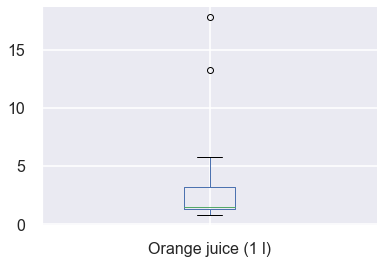

In [18]:
fprice["Orange juice (1 l)"].to_frame().boxplot(return_type='axes')

In [19]:
fprice["Orange juice (1 l)"].skew()

2.266783808200043

In [59]:
sortedprice = fprice.sort_values(by='Lithuania', axis=1, ascending=False)
sortedprice.loc["Lithuania"].head()

COICOP
Sofa set (1 set)                                                 827.28
Laptop, Hard Disc 750 GB - 1 TB, RAM 8 GB (1 piece)              725.71
Television, screen size 42'' (1 piece)                           513.60
Fridge-freezer, energy efficiency A+ (1 piece)                   327.00
Washing machine, 6-7 kg, energy efficiency A++/A+++ (1 piece)    306.59
Name: Lithuania, dtype: float64

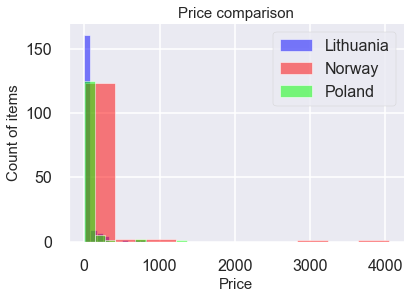

In [94]:
fprice.loc["Lithuania"].hist(lw=0.5, fc=(0, 0, 1, 0.5), label="Lithuania")
fprice.loc["Norway"].hist(lw=0.5, fc=(1, 0, 0, 0.5), label="Norway")
fprice.loc["Poland"].hist(lw=0.5, fc=(0, 1, 0, 0.5), label="Poland")
plt.title("Price comparison", fontsize=15)
plt.xlabel("Price", fontsize=15)
plt.ylabel("Count of items",fontsize=15)
plt.legend();